(0.9, 2.2)

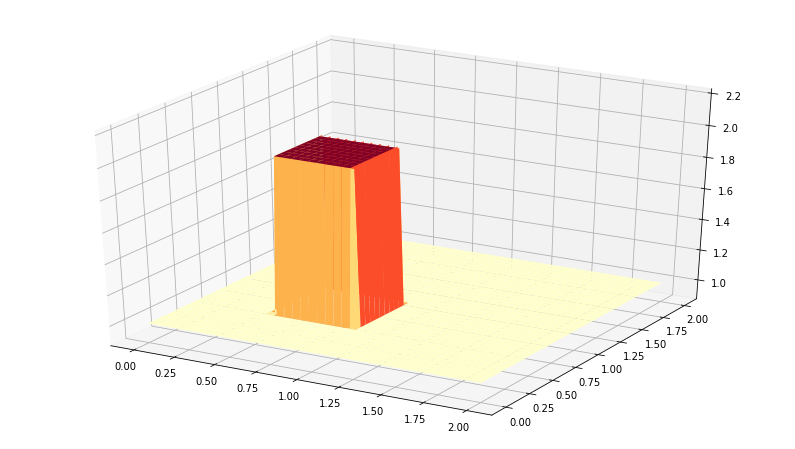

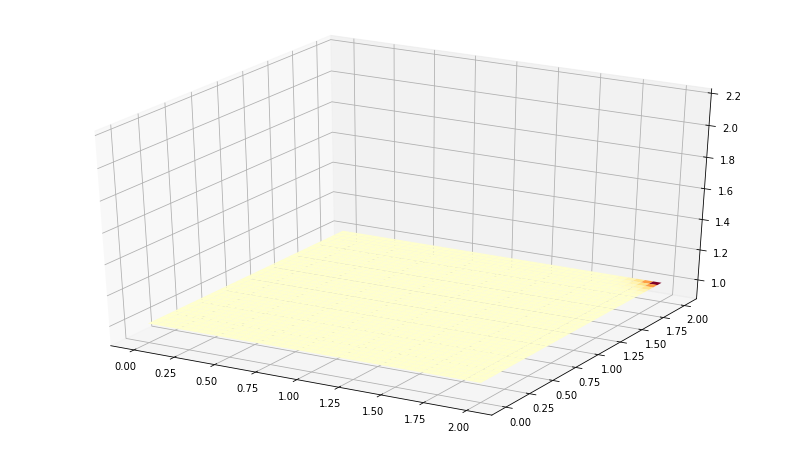

In [33]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import animation
from IPython.display import Video

# convection speed
c = 1

# domain limits
x_start, x_end = 0, 2
y_start, y_end = 0, 2

# number of grid points
nodes_x = 81
nodes_y = 81
steps_t = 400

# CFL number
cfl = 0.2

# step sizes
dx = (x_end - x_start)/(nodes_x - 1)
dy = (y_end - y_start)/(nodes_y - 1)

# generate grid
x = np.linspace(x_start, x_end, nodes_x)
y = np.linspace(x_start, x_end, nodes_y)
X, Y = np.meshgrid(x, y)

# initialize solution matrix
U1 = np.ones(np.shape(X)) # at time step n
U2 = U1   # at time step n+1

# set up matrix to store full solution
dim = list(np.shape(X))
dim.append(steps_t)
U = np.ones(dim)


# set initial conditions
U1[np.int(0.5/dx):np.int(1/dx), np.int(0.5/dy):np.int(1/dy)] = 2
U0 = U1
U[:,:,0] = U0

# grab number of rows and columns
rows, cols = U1.shape

# set-up for transient plot animation
fig  = plt.figure(figsize=[14, 8])
ax   = fig.add_subplot(1,1,1, projection='3d')
ax.set_zlim(0.9, 2.2)
surf = ax.plot_surface(X, Y, U2, cmap='YlOrRd') 

# solve finite difference equations
for n in range(1, steps_t):
    U2 = U1
    U2[1:, 1:] -= cfl * (U1[1:, 1:] - U1[0:-1, 1:])
    U2[1:, 1:] -= cfl * (U1[1:, 1:] - U1[1:, 0:-1])
    U1 = U2
    U[:, :, n] = U2
    

# plot initial conditions
fig0  = plt.figure(figsize=[14, 8])
ax0   = fig0.add_subplot(1,1,1, projection='3d')
surf0 = ax0.plot_surface(X, Y, U[:,:,steps_t-1], cmap='YlOrRd')    
ax0.set_zlim(0.9, 2.2)
    


In [34]:
# solve finite difference equations
def animate(n):
    ax.clear()
    ax.set_zlim(0.9, 2.2)
    surf = ax.plot_surface(X, Y, U[:,:,n], cmap='YlOrRd') 
    #ax.set_zlim(0.9, 2.2)
    return surf

ani = animation.FuncAnimation(fig, animate, interval=25, save_count=steps_t)

# supress static figure from being plotted
plt.close()

ani.save("2D_lin_conv.mp4") # save as mp4
Video("2D_lin_conv.mp4")    # display video in console

In [43]:
# set up matrix to store full solution
X = np.ones([10, 10])
dim = list(np.shape(X))
dim.append(steps_t)
U = np.ones(dim)
dim

[10, 10, 81]

In [30]:
plt.show()

In [6]:
ax.clear()
